In [ ]:
#lessons I learned:
#https://stackoverflow.com/questions/20186344/ipynb-import-another-ipynb-file
#https://stackoverflow.com/questions/17098654/how-to-store-a-dataframe-using-pandas
#https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas
#https://realpython.com/python-f-strings/
#https://stackoverflow.com/questions/48958282/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python
#https://stackoverflow.com/questions/11350770/select-by-partial-string-from-a-pandas-dataframe
#https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

## Introduction

Data Visualization is an essential part of the data science process. For this particular project, IMDB Movie Rating Comparison Over the Years, I will show how ratings have changed over the last 3 decades with my IMDB dataset containing over 45,000 movies. These days I have been disappointed by the quality of Comedy and Drama Movies these days, much more preferring the 1990s to early 2000s ones. For that reason, I will focus my visualizations and analysis on "Comedy" and "Drama" movies.


## Import Libraries

In [61]:
import pandas as pd
import csv
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from functools import reduce


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
# load in our dataframe with movies from 1990s to 2019 using pickle
df = pd.read_pickle('results.pkl')

In [14]:
df.describe() # 45,924
df.head()

,primaryTitle,startYear,genres,averageRating,numVotes,runtimeMinutes,titleType,region,titleId
12797,Kate & Leopold,2001,"Comedy,Fantasy,Romance",6.4,74330,118,movie,US,tt0035423
26357,"Wenn du groß bist, lieber Adam",1990,"Drama,Fantasy",6.9,23,78,movie,US,tt0059900
30878,The Other Side of the Wind,2018,Drama,6.9,4589,122,movie,US,tt0069049
36244,Me and the Kid,1993,"Comedy,Crime,Drama",5.3,211,94,movie,US,tt0081145
36467,Vincent and Me,1990,"Drama,Family,Fantasy",6.5,278,100,movie,US,tt0081721


## Average Rating of US Movies from 1990-2019

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


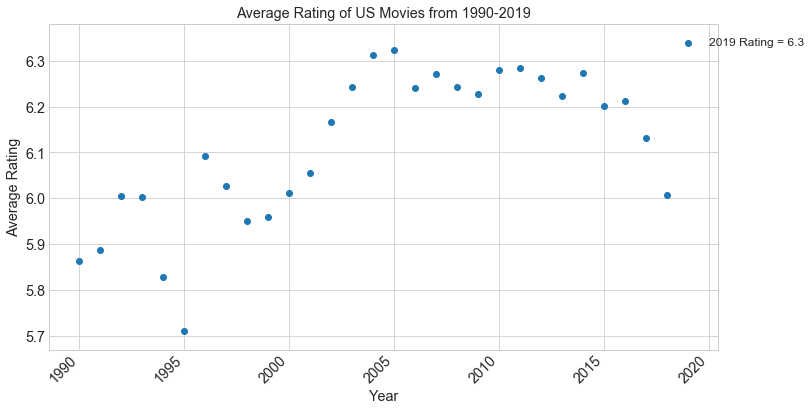

In [32]:
# Combined average rating of every move at every year
allyears_ratings = df.groupby('startYear', as_index=False)['averageRating'].mean() #as_index=True to output Series

# Choose style
print(plt.style.available)
plt.style.use('seaborn-whitegrid')

# Create fig,ax object and set scaffold
fig, ax = plt.subplots(figsize=(12,6))
ax.set(title='Average Rating of US Movies from 1990-2019', xlabel = 'Year', ylabel = 'Average Rating')

# Format labels
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment = 'right', rotation=45,)

# annotate graph to label 'new companies'
thisyear_ratings = allyears_ratings[allyears_ratings['startYear']==2019]['averageRating']
# add average rating next to 2019 point,
ax.text(2020, thisyear_ratings, '2019 Rating = %s'%(np.round(thisyear_ratings[29], 1)), fontsize=12, verticalalignment='center') #29 yrs since 1990

# Plot Graph
ax.scatter(allyears_ratings['startYear'], allyears_ratings['averageRating']);

# Adjust all sizes of Labels
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Average Rating of US Comedy Movies from 1990-2019

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


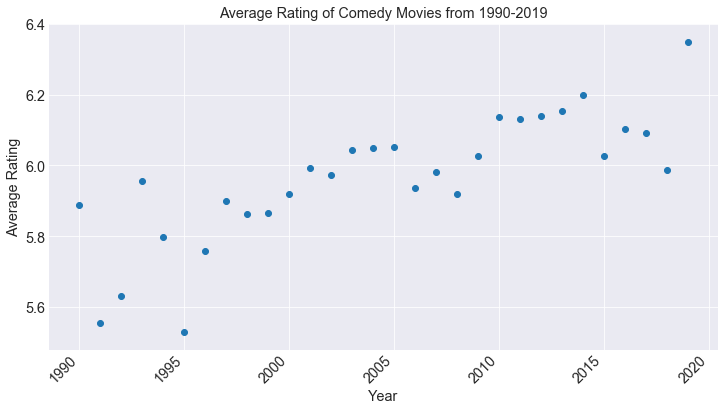

In [40]:
# initially trying to split the genre values using split() but used a much better method, str.contains()

# All Movies Containing Comedy Genre Only
allcomedy = df[df['genres'].str.contains("Comedy")]

allyears_comedy = allcomedy.groupby('startYear', as_index=False)['averageRating'].mean()

# Choose style
print(plt.style.available)
plt.style.use('seaborn-darkgrid')

# Create fig,ax object and set scaffold
fig, ax = plt.subplots(figsize=(12,6))
ax.set(title='Average Rating of Comedy Movies from 1990-2019', xlabel = 'Year', ylabel = 'Average Rating')

# Format labels
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment = 'right', rotation=45,)

# Plot Graph
ax.scatter(allyears_comedy['startYear'], allyears_comedy['averageRating']);

# Adjust all sizes of Labels
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Average Rating of Drama Movies from 1990-2019

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


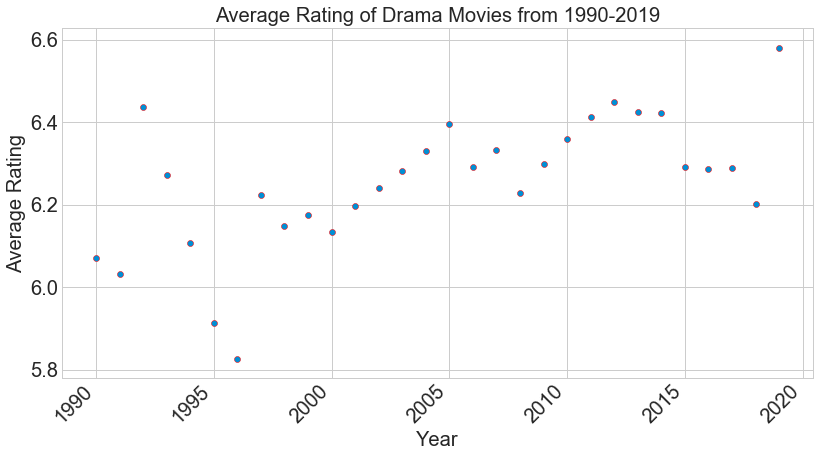

In [69]:

# All Movies Containing Drama Genre Only
alldrama = df[df['genres'].str.contains("Drama")]

# Group Year Made with Average Rating
allyears_drama = alldrama.groupby('startYear', as_index=False)['averageRating'].mean()

# Choose style
print(plt.style.available)
plt.style.use('seaborn-whitegrid')

# Create fig,ax object and set scaffold
fig, ax = plt.subplots(figsize=(12,6))
ax.set(title='Average Rating of Drama Movies from 1990-2019', xlabel = 'Year', ylabel = 'Average Rating')

# Format labels
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment = 'right', rotation=45,)

# Plot Graph
ax.scatter(allyears_drama['startYear'], allyears_drama['averageRating'],edgecolors='red');

# Adjust all sizes of Labels
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Combined Comedy and Drama Plots

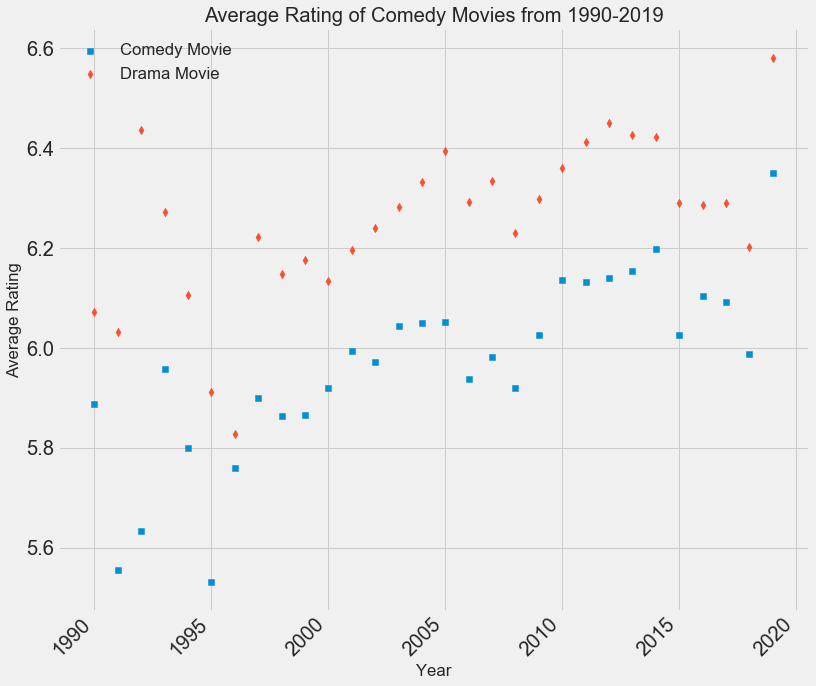

In [68]:
# initially trying to split the genre values using split() but used a much better method, str.contains()

# All Movies Containing Comedy Genre Only
allcomedy = df[df['genres'].str.contains("Comedy")]

allyears_comedy = allcomedy.groupby('startYear', as_index=False)['averageRating'].mean()

# Choose style
# print(plt.style.available)
plt.style.use('fivethirtyeight')

# Create fig,ax object and set scaffold
fig, ax = plt.subplots()
ax.set(title='Average Rating of Comedy Movies from 1990-2019', xlabel = 'Year', ylabel = 'Average Rating')

# Format labels
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment = 'right', rotation=45,)

# Plot Graph
ax.scatter(allyears_comedy['startYear'], allyears_comedy['averageRating'], marker='s', label='Comedy Movie');
ax.scatter(allyears_drama['startYear'], allyears_drama['averageRating'], marker='d', label='Drama Movie');
ax.legend();

# Adjust all sizes of Labels
params = {'legend.fontsize': 'large',
          'figure.figsize': (12,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params);

## Number of Votes on IMDB from 1990-2019

I want to see the number of votes for each year. I see that:<br>
1. From 1990-1992, there are very few votes.
2. Votes begin ramping up 199

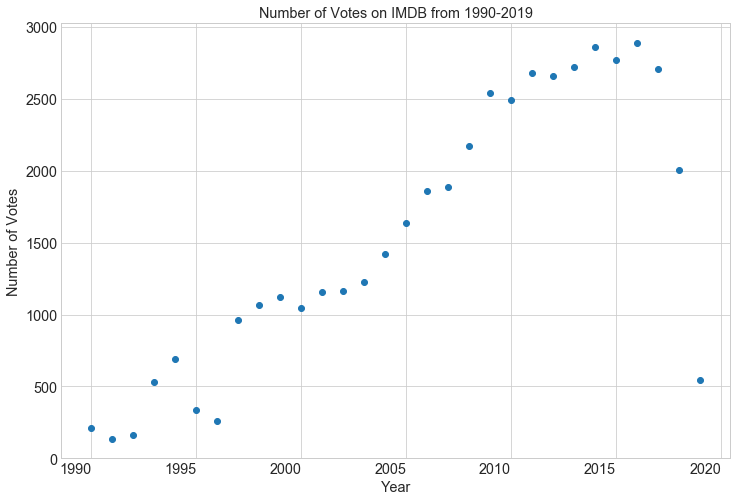

In [33]:
#as_index parameter creates series or pandas
allyears_numvotes = df.groupby('startYear',as_index=False)['numVotes'].count() 

# set scaffold
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(allyears_numvotes['startYear'], allyears_numvotes['numVotes'])

# create labels
labels = ax.get_xticklabels()
plt.setp(labels, horizontalalignment='right');
ax.set(title='Number of Votes on IMDB from 1990-2019', xlabel = 'Year', ylabel = 'Number of Votes');

# Adjust all sizes of Labels
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)